Importamos las dependencias necesarias para el desarrollo del trabajo.

In [29]:
from main import runGame
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Aqui vemos un ejemplo de como ejecutar el juego.

In [2]:
runGame(['main.py', '-l', 'level2.txt', '-m', 'astar', '-H', 'manhattan'])

{'success': True,
 'method': 'astar',
 'level': 'level2.txt',
 'heuristic': 'manhattan',
 'cost': 78,
 'exploredNodes': 30367,
 'frontierNodes': 31,
 'runtime': 1.6160001754760742}

Ahora realizamos 10 iteraciones de la función runGame con cada algoritmo de búsqueda, para cada nivel y para cada heuristica. Nos guardamos estos resultados en un dataframe para poder analizarlos más adelante.

In [3]:
methods = ['dfs', 'bfs', 'greedy', 'astar']
heuristics = ['manhattan', 'combined']
levels = ['level1.txt', 'level2.txt', 'level3.txt', 'level4.txt', 'level5.txt']

aux = []

for level in levels:
    for method in methods:
        for heuristic in heuristics:
            for _ in range(10):
                aux.append(runGame(['main.py', '-l', level, '-m', method, '-H', heuristic]))

df = pd.DataFrame(aux)
df

,success,method,level,heuristic,cost,exploredNodes,frontierNodes,runtime
0,True,dfs,level1.txt,manhattan,3,22,1,0.001001
1,True,dfs,level1.txt,manhattan,3,22,1,0.000000
2,True,dfs,level1.txt,manhattan,3,22,1,0.000000
3,True,dfs,level1.txt,manhattan,3,22,1,0.000000
4,True,dfs,level1.txt,manhattan,3,22,1,0.000999
...,...,...,...,...,...,...,...,...
395,False,astar,level5.txt,combined,0,17,0,0.000000
396,False,astar,level5.txt,combined,0,17,0,0.000000
397,False,astar,level5.txt,combined,0,17,0,0.001001
398,False,astar,level5.txt,combined,0,17,0,0.000000


En esta parte, normalizamos los datos obtenidos en el punto anterior. Como los algoritmos de búsqueda desinformados no utilizan heurísticas para decidir qué camino tomar, separamos el dataframe original en 2 diferentes: uno para los métodos de búsqueda desinformados y otro para los informados.

Una vez realizado ese proceso, del dataframe de los métodos desinformados, eliminamos la columna heurística ya que no es necesaria. Y del dataframe de los métodos informados, agregamos la heurística utilizada en cada caso como parte del nombre del método entre parentesis con el objetivo de luego eliminar la columna heurística y asi tener los dos dataframes con las mismas columnas.

Por último, concatenamos estos 2 dataframes en uno solo con el que trabajaremos más adelante para realizar los gráficos y analizar los datos.

In [4]:

informed_methods_df = df[(df['method'] == 'astar') | (df['method'] == 'greedy')]
informed_methods_df.loc[:, 'method'] = informed_methods_df['method'] + '(' + informed_methods_df['heuristic'] + ')'
informed_methods_df = informed_methods_df.drop('heuristic', axis=1)

uninformed_methods_df = df[(df['method'] == 'bfs') | (df['method'] == 'dfs')]
uninformed_methods_df = uninformed_methods_df.drop('heuristic', axis=1)

final_df = pd.concat([uninformed_methods_df, informed_methods_df])

Como medida de precaución, guardamos la información de los diferentes dataframes en archivos csv.

In [5]:
df.to_csv('data/data.csv')
uninformed_methods_df.to_csv('data/uninformed.csv')
informed_methods_df.to_csv('data/informed.csv')
final_df.to_csv('data/normalized_data.csv')

Si no se quiere volver a correr el código, se pueden cargar los archivos de datos ya procesados. Para ello descomentar la línea de código correspondiente en el siguiente bloque.


In [30]:
df = pd.read_csv('data/data.csv')
uninformed_methods_df = pd.read_csv('data/uninformed.csv')
informed_methods_df = pd.read_csv('data/informed.csv')
final_df = pd.read_csv('data/normalized_data.csv')

In [31]:
final_df.groupby(['level','method']).mean(numeric_only=True)

Unnamed: 0  success    cost  exploredNodes  \
level      method                                                          
level1.txt astar(combined)          74.5      1.0     3.0            7.0   
           astar(manhattan)         64.5      1.0     3.0            7.0   
           bfs                      29.5      1.0     3.0            7.0   
           dfs                       9.5      1.0     3.0           22.0   
           greedy(combined)         54.5      1.0     3.0            6.0   
           greedy(manhattan)        44.5      1.0     3.0            6.0   
level2.txt astar(combined)         154.5      1.0    78.0        30305.0   
           astar(manhattan)        144.5      1.0    78.0        30367.0   
           bfs                     109.5      1.0    78.0        30396.0   
           dfs                      89.5      1.0  1478.0        15869.0   
           greedy(combined)        134.5      1.0   104.0         1341.0   
           greedy(manhattan)       124.5      1.0   104.0         1339.0   
level3.txt astar(combined)         234.5      1.0    10.0           76.0   
           astar(manhattan)        224.5      1.0    10.0           76.0   
           bfs                     189.5      1.0    10.0          133.0   
           dfs                     169.5      1.0    14.0           89.0   
           greedy(combined)        214.5      1.0    10.0           30.0   
           greedy(manhattan)       204.5      1.0    10.0           30.0   
level4.txt astar(combined)         314.5      1.0    60.0        49674.0   
           astar(manhattan)        304.5      1.0    60.0        54585.0   
           bfs                     269.5      1.0    60.0        61397.0   
           dfs                     249.5      1.0  1892.0        56486.0   
           greedy(combined)        294.5      1.0    74.0          805.0   
           greedy(manhattan)       284.5      1.0    64.0          967.0   
level5.txt astar(combined)         394.5      0.0     0.0           17.0   
           astar(manhattan)        384.5      0.0     0.0           17.0   
           bfs                     349.5      0.0     0.0           17.0   
           dfs                     329.5      0.0     0.0           17.0   
           greedy(combined)        374.5      0.0     0.0           17.0   
           greedy(manhattan)       364.5      0.0     0.0           17.0   

                              frontierNodes    runtime  
level      method                                       
level1.txt astar(combined)              1.0   0.000100  
           astar(manhattan)             1.0   0.000000  
           bfs                          1.0   0.000203  
           dfs                          1.0   0.000177  
           greedy(combined)             1.0   0.000352  
           greedy(manhattan)            1.0   0.000104  
level2.txt astar(combined)             51.0   3.132236  
           astar(manhattan)            31.0   2.849795  
           bfs                         17.0   0.420201  
           dfs                        629.0   0.188136  
           greedy(combined)           117.0   0.037377  
           greedy(manhattan)          119.0   0.033056  
level3.txt astar(combined)             20.0   0.001609  
           astar(manhattan)            20.0   0.001151  
           bfs                         40.0   0.001034  
           dfs                          9.0   0.000835  
           greedy(combined)             8.0   0.000697  
           greedy(manhattan)            8.0   0.000459  
level4.txt astar(combined)           1833.0  12.925907  
           astar(manhattan)          1521.0  12.940256  
           bfs                        747.0   1.034369  
           dfs                        911.0   0.870402  
           greedy(combined)            84.0   0.019560  
           greedy(manhattan)          134.0   0.034844  
level5.txt astar(combined)              0.0   0.000552  
           astar(manhattan)             0.0   0.000051  
 

In [32]:
final_df.groupby(['level']).mean(numeric_only=True)

,Unnamed: 0,success,cost,exploredNodes,frontierNodes,runtime
level,,,,,,
level1.txt,39.5,1.0,3.00,10.500,1.00,0.000165
level2.txt,119.5,1.0,434.50,19485.250,201.25,0.908642
level3.txt,199.5,1.0,11.00,82.000,19.25,0.000957
level4.txt,279.5,1.0,520.25,42724.625,861.00,3.716264
level5.txt,359.5,0.0,0.00,17.000,0.00,0.000265


In [33]:
final_df.groupby(['method']).mean(numeric_only=True)

,Unnamed: 0,success,cost,exploredNodes,frontierNodes,runtime
method,,,,,,
astar(combined),234.5,0.8,30.2,16015.8,381.0,3.212081
astar(manhattan),224.5,0.8,30.2,17010.4,314.6,3.158250
bfs,189.5,0.8,30.2,18390.0,161.0,0.291197
dfs,169.5,0.8,677.4,14496.6,310.0,0.211940
greedy(combined),214.5,0.8,38.2,439.8,42.0,0.011709
greedy(manhattan),204.5,0.8,36.2,471.8,52.4,0.013753


In [34]:
informed_methods_df.groupby(['method']).mean(numeric_only=True)

,Unnamed: 0,success,cost,exploredNodes,frontierNodes,runtime
method,,,,,,
astar(combined),234.5,0.8,30.2,16015.8,381.0,3.212081
astar(manhattan),224.5,0.8,30.2,17010.4,314.6,3.158250
greedy(combined),214.5,0.8,38.2,439.8,42.0,0.011709
greedy(manhattan),204.5,0.8,36.2,471.8,52.4,0.013753


# Gráficos
## Tiempo de resolución para cada nivel
### Nivel 1

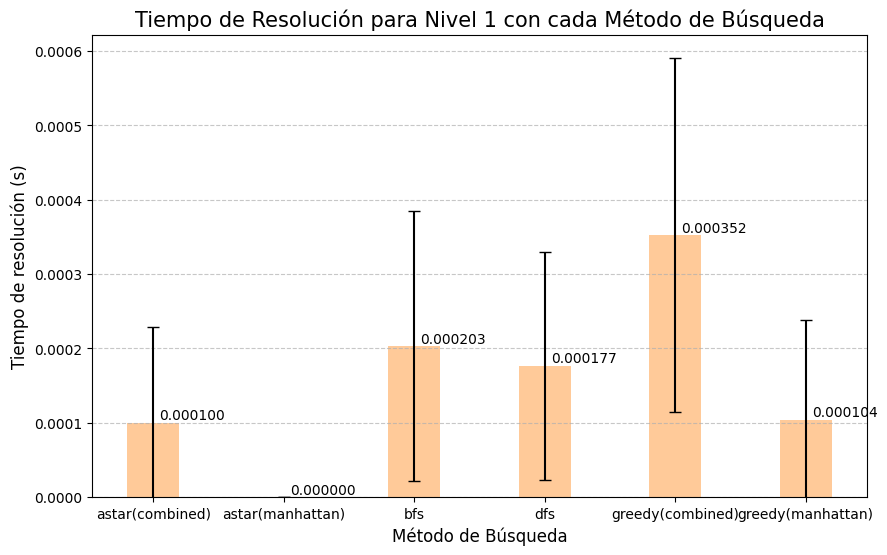

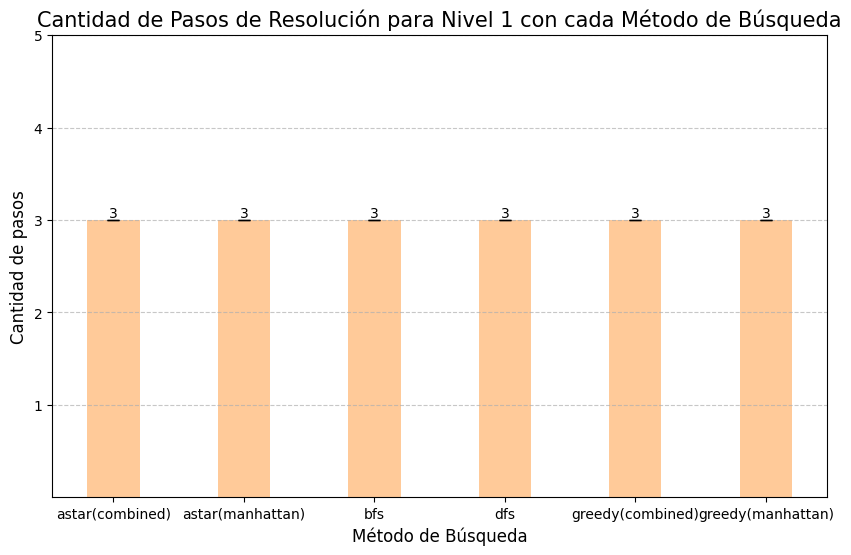

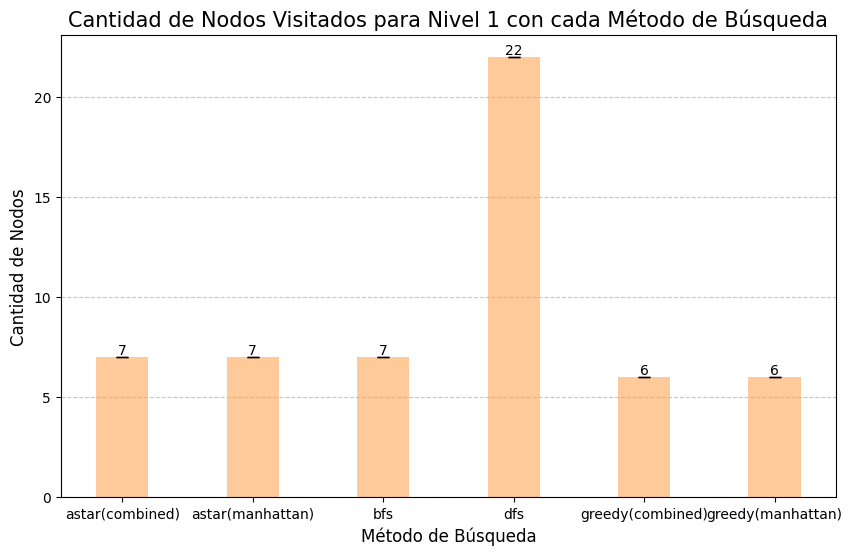

In [58]:
level_data = final_df.loc[final_df['level'] == 'level1.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)
methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
bars = plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width() * 1.25, yval, '{:.6f}'.format(yval), ha='center', va='bottom', fontsize=10)

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Tiempo de Resolución para Nivel 1 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

# -------------------------------------------------------------------------------------

cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Pasos de Resolución para Nivel 1 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(1,6))
plt.show()


#Grafico de nodos visitados
visited_nodes = mean_data['exploredNodes'].tolist()
std_error_visited = (level_data.std(numeric_only=True)['exploredNodes'] / np.sqrt(len(level_data['exploredNodes'].mean()['exploredNodes']))).tolist()


plt.figure(figsize=(10,6))
bars = plt.bar(methods, visited_nodes, yerr=std_error_visited, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Nodos Visitados para Nivel 1 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de Nodos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nivel 2

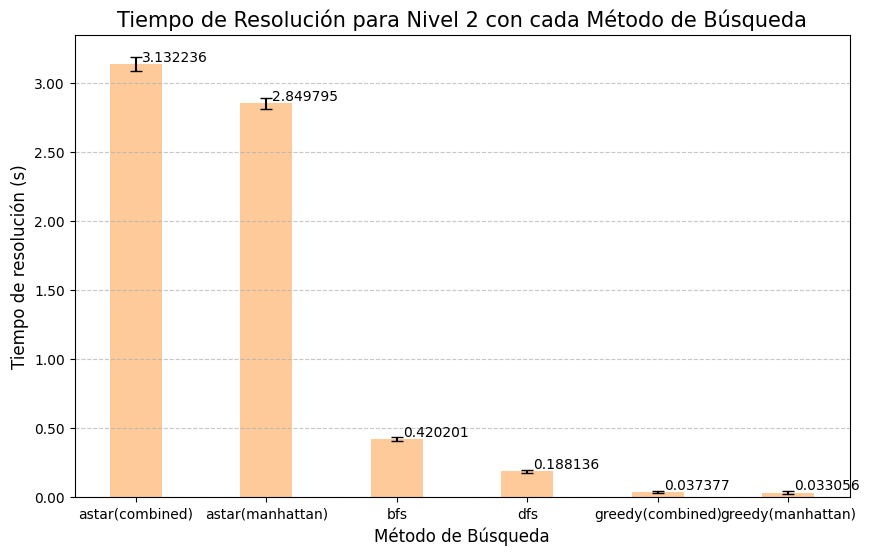

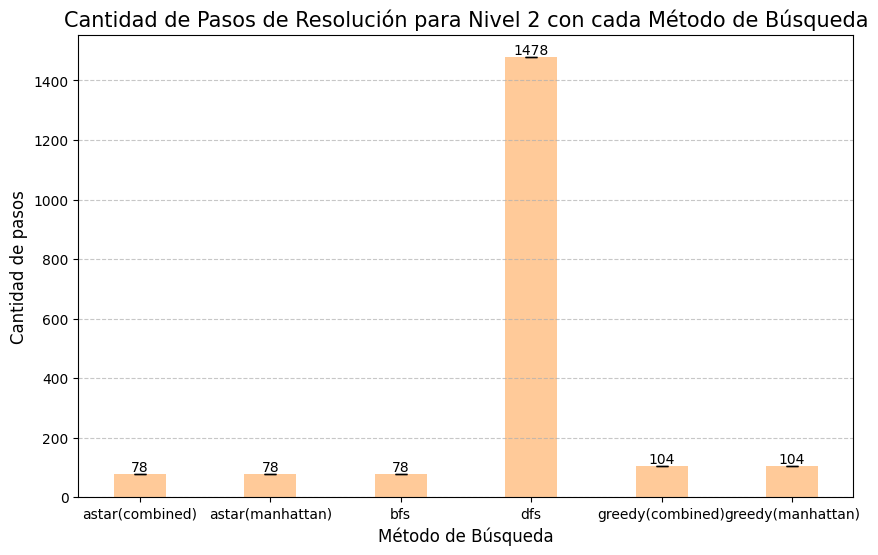

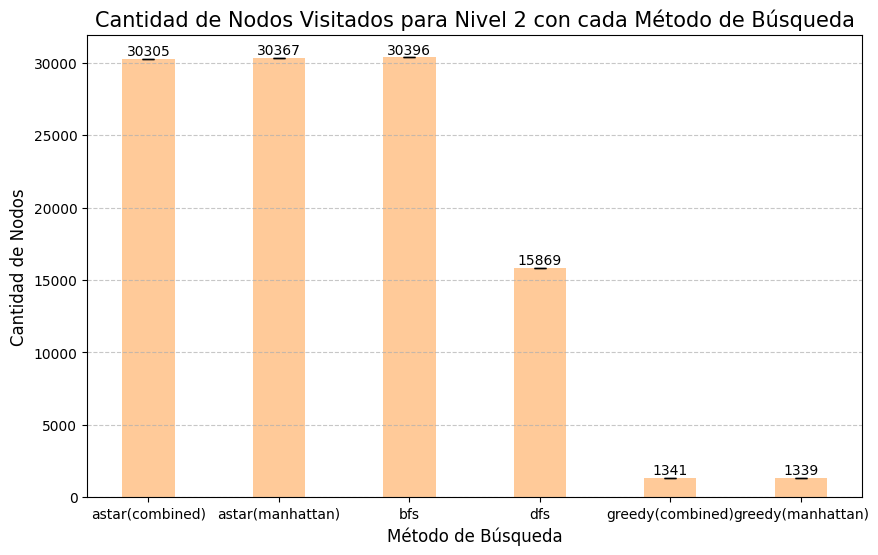

In [60]:
level_data = final_df.loc[final_df['level'] == 'level2.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

yvalues = []
for n in range(0, 35, 5):  
    yvalues.append(n/10.0)

plt.figure(figsize=(10,6))
bars = plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width() * 1.25, yval, '{:.6f}'.format(yval), ha='center', va='bottom', fontsize=10)


def float_formatter(x, pos):
    return '{:.2f}'.format(x)
formatter = FuncFormatter(float_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Tiempo de Resolución para Nivel 2 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.yticks(yvalues)
plt.show()

# -------------------------------------------------------------------------------------

cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)


plt.title('Cantidad de Pasos de Resolución para Nivel 2 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Grafico de nodos visitados
visited_nodes = mean_data['exploredNodes'].tolist()
std_error_visited = (level_data.std(numeric_only=True)['exploredNodes'] / np.sqrt(len(level_data['exploredNodes'].mean()['exploredNodes']))).tolist()


plt.figure(figsize=(10,6))
bars = plt.bar(methods, visited_nodes, yerr=std_error_visited, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Nodos Visitados para Nivel 2 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de Nodos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nivel 3

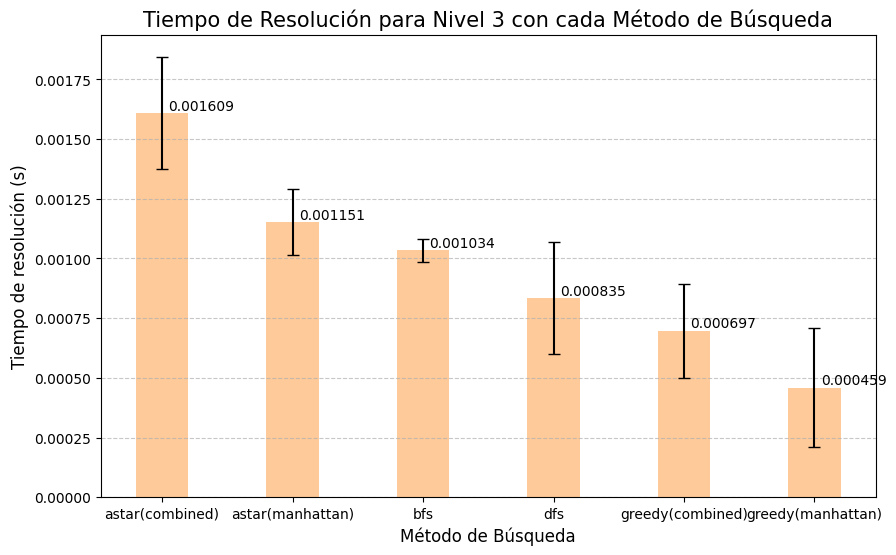

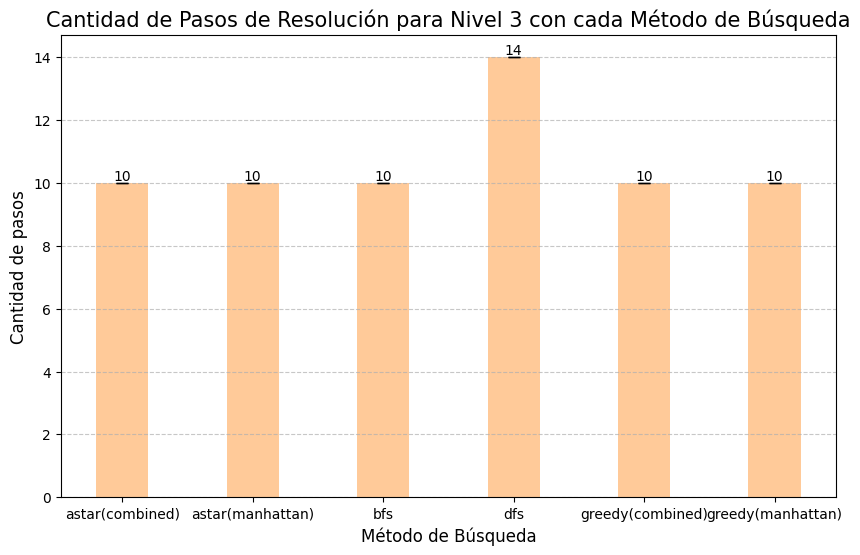

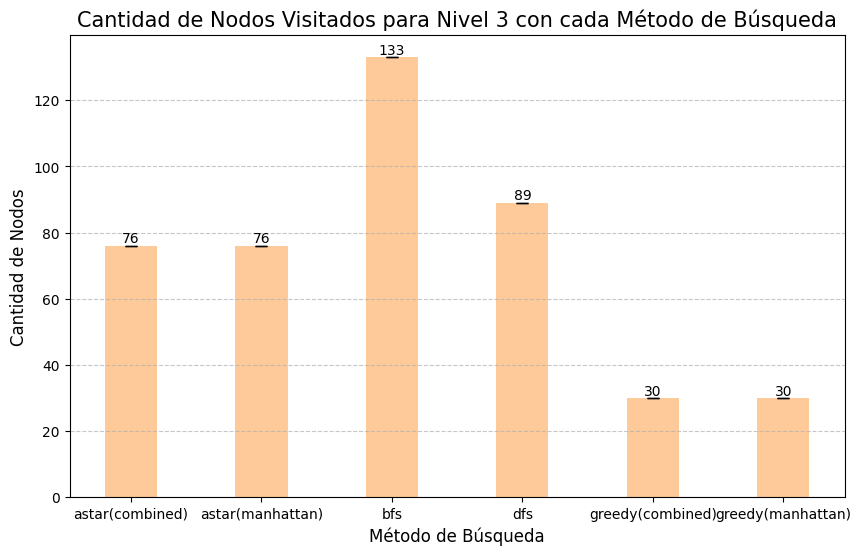

In [61]:
level_data = final_df.loc[final_df['level'] == 'level3.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
bars = plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width() * 1.25, yval, '{:.6f}'.format(yval), ha='center', va='bottom', fontsize=10)

plt.title('Tiempo de Resolución para Nivel 3 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

# -------------------------------------------------------------------------------------

cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Pasos de Resolución para Nivel 3 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Grafico de nodos visitados
visited_nodes = mean_data['exploredNodes'].tolist()
std_error_visited = (level_data.std(numeric_only=True)['exploredNodes'] / np.sqrt(len(level_data['exploredNodes'].mean()['exploredNodes']))).tolist()


plt.figure(figsize=(10,6))
bars = plt.bar(methods, visited_nodes, yerr=std_error_visited, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Nodos Visitados para Nivel 3 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de Nodos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nivel 4

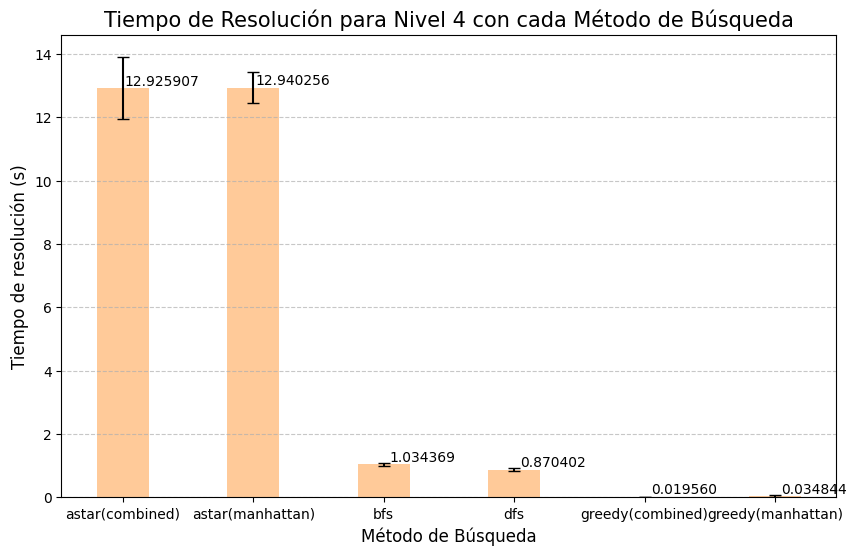

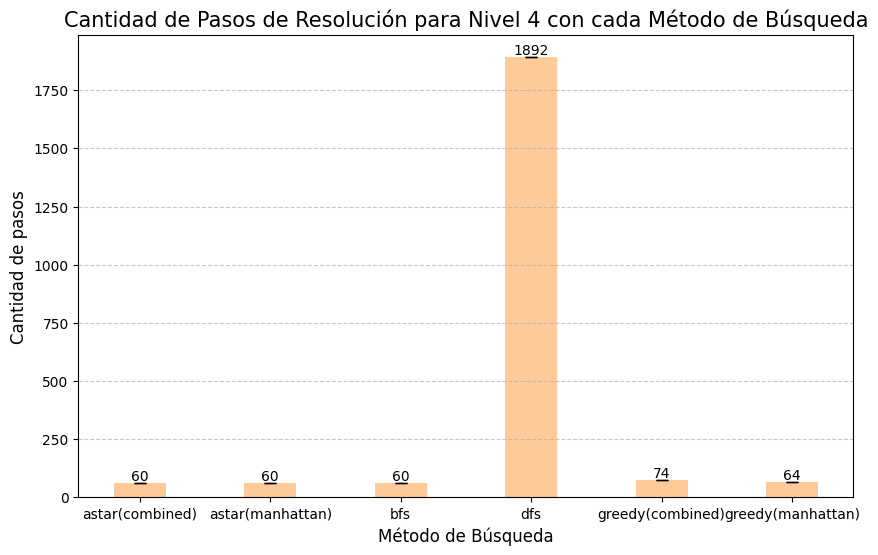

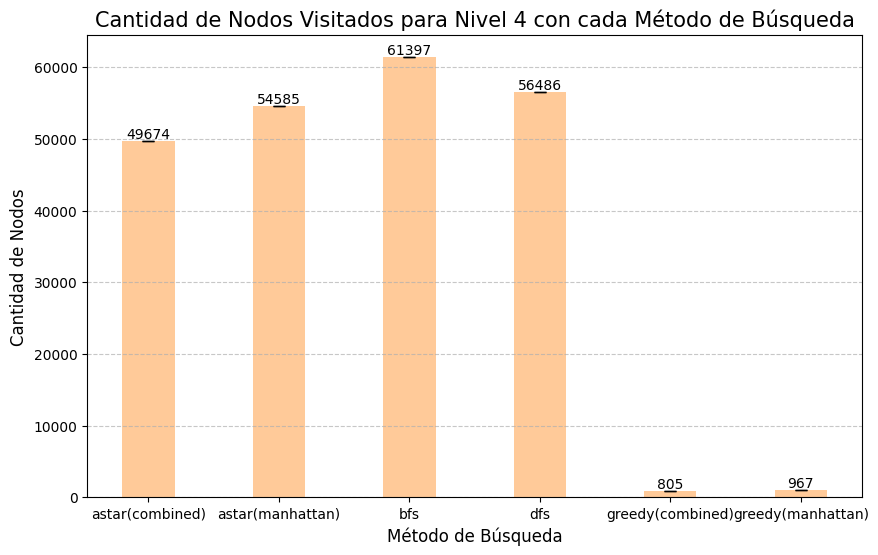

In [62]:
level_data = final_df.loc[final_df['level'] == 'level4.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

yvalues = []
for n in range(0, 15, 2):
    yvalues.append(n/1.0)

#Grafico de tiempo de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width() * 1.25, yval, '{:.6f}'.format(yval), ha='center', va='bottom', fontsize=10)

plt.title('Tiempo de Resolución para Nivel 4 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.yticks(yvalues)
plt.show()

# -------------------------------------------------------------------------------------
cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Pasos de Resolución para Nivel 4 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Grafico de nodos visitados
visited_nodes = mean_data['exploredNodes'].tolist()
std_error_visited = (level_data.std(numeric_only=True)['exploredNodes'] / np.sqrt(len(level_data['exploredNodes'].mean()['exploredNodes']))).tolist()


plt.figure(figsize=(10,6))
bars = plt.bar(methods, visited_nodes, yerr=std_error_visited, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Nodos Visitados para Nivel 4 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de Nodos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

